#[Tutorial: Legal IR and NLP: the History, Challenges, and State-of-the-Art](https://ecir2023.org/programs/tutorials.html?v=3.8) 
[Tutorial Paper](https://rdcu.be/c86FU) | [GitHub Repository](https://github.com/Law-AI/ecir2023tutorial/)

Debasis Ganguly (University of Glasgow, UK)

Jack G. Conrad (Thomson Reuters Labs, USA)

Kripabandhu Ghosh (Indian Institute of Science Education And Research Kolkata, India)

Saptarshi Ghosh (Indian Institue of Technology Kharagpur, India)

Pawan Goyal (Indian Institue of Technology Kharagpur, India)

Paheli Bhattacharya (Indian Institue of Technology Kharagpur, India)

Shubham Kumar Nigam (Indian Institute of Technology Kanpur, India)

Shounak Paul (Indian Institue of Technology Kharagpur, India)

# PRELIMINARIES -- Importing packages and setting up global parameters

To install the transformers and datasets packages in Python, you can use the following commands:

The transformers package provides a set of tools to work with state-of-the-art pre-trained models for natural language processing, including BERT, GPT-2, and others. The datasets package provides a collection of datasets that can be used to train and evaluate natural language processing models.

In [1]:
!python -m pip install transformers
!python -m pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 23.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 29.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 19.7 MB/s eta 0:00:0

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
ROOT = "/content/drive/MyDrive/ECIR_Legal_Tutorial"

In the code snippet below, there are four different tasks listed, each with a different comment specifying the nature of the task. These tasks are related to natural language processing and involve various aspects of text analysis.


*   **[Statute-Identification](https://arxiv.org/abs/2112.14731)** [(Paper)](https://arxiv.org/abs/2112.14731) [(GitHub)](https://github.com/coastalcph/lex-glue) [(Dataset)](https://github.com/coastalcph/lex-glue), is a multi-label text classification task. This means that the goal is to classify input text into multiple categories or labels. For example, given a legal document, we might want to classify each paragraph into different categories based on the specific legal statutes that are relevant to that paragraph. **Input:** [sent1, sent2, ...], **Output:** [relevant_label1, relevant_label2, ..]
*   **[Judgment-Prediction](https://aclanthology.org/2021.acl-long.313.pdf)** [(Paper)](https://aclanthology.org/2021.acl-long.313.pdf) [(GitHub)](https://github.com/Exploration-Lab/CJPE) [(Dataset)](https://github.com/Exploration-Lab/CJPE/tree/main/Data), is a binary text classification task. This means that the goal is to classify input text into one of two categories. For example, given a news article, we might want to classify the article as either positive or negative in tone. **Input:** [sent1, sent2, ...], **Output:** 0/1
*   **[Semantic-Segmentation](https://arxiv.org/abs/1911.05405)** [(Paper)](https://arxiv.org/abs/1911.05405) [(GitHub)]() [(Dataset)](), is a multi-class sequence labeling task over sentences. This means that the goal is to assign a label to each sentence in a document. For example, given a medical report, we might want to label each sentence as relating to a specific symptom or medical condition. **Input:** [sent1, sent2, ...], **Output:** [label1, label2, ..]
*   **[Extractive-Summarization](https://aclanthology.org/2022.aacl-main.77.pdf)** [(Paper)](https://aclanthology.org/2022.aacl-main.77.pdf) [(GitHub)]() [(Dataset)](), is a binary sequence labeling task. This means that the goal is to identify which parts of the input text should be included in a summary and which parts should be excluded. For example, given a news article, we might want to identify the most important sentences that should be included in a summary of the article. **Input:** [sent1, sent2, ...], **Output:** [0/1, 0/1, ..]









In [4]:
TASK = "statute-identification" # multi-label text classification
# TASK = "judgment-prediction"    # binary text classification
# TASK = "semantic-segmentation"  # multi-class sequence labeling over sentences
# TASK = "ext-summarization"      # binary sequence labeling

The below code imports several Python libraries and defines type hints for various objects that will be used throughout the code.

* The json library is used to work with JSON data. 
* The numpy library is used for numerical computations in Python. 
* The torch library is used for tensor operations and building neural networks. The nn module from torch is used to define neural network layers. 
* The F module from torch.nn is used to apply activation functions. 
* The typing module is used to define type hints for objects and functions.

* The type hints define the expected types of various objects, including Any, Callable, Dict, List, NewType, Optional, Tuple, and Union. These type hints help improve the readability and maintainability of the code by explicitly stating the expected types of objects and parameters.




In [5]:
import json
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from typing import Any, Callable, Dict, List, NewType, Optional, Tuple, Union

Although this notebook is configured for the 4 tasks described above, we will only cover the statute identification task.
For this purpose, we will use the ECtHR-B dataset from the LexGLUE benchmark. 

This dataset comprises of facts taken from judgment documents of the European Court of Human Rights. The target set of statutes comprises of 10 articles from the European Convention on Human Rights. The dataset is provided with train/dev/test splits of 9000/1000/1000 facts from judgment documents. Corresponding to each document, one or more statutes can be relevant.

For the purpose of this tutorial, we use a heavily truncated version of the dataset. We take only the first 8 documents of the train and test splits. All 10 labels are considered, though.

The below code loads a JSON file containing label vocabulary for the specified task. The name of the file is generated based on the value of the TASK variable.

The open() function is used to open the file in read mode, and the resulting file object is passed to the json.load() function. This function reads the contents of the file and parses them as JSON data, converting them into a Python object.

The resulting object is assigned to the label_vocab variable, which will be used later in the code to map labels to their corresponding indices.

In [6]:
with open(f'{ROOT}/{TASK}-labels.json') as fr:
    label_vocab = json.load(fr)

In [7]:
label_vocab

{'2': 0,
 '3': 1,
 '5': 2,
 '6': 3,
 '8': 4,
 '9': 5,
 '10': 6,
 '11': 7,
 '14': 8,
 'P1-1': 9}

In [8]:
with open(f'{ROOT}/{TASK}-train.json') as fr:
    train_dataset = json.load(fr)

In [9]:
train_dataset.keys()

dict_keys(['version', 'data'])

In [10]:
train_dataset['version']

'1.0.0'

In [11]:
type(train_dataset['data'])

list

In [12]:
train_dataset['data'][0].keys()

dict_keys(['id', 'text', 'labels'])

In [13]:
train_dataset['data'][0]

{'id': '001-59589',
 'text': ['9.  The applicant is an Italian citizen, born in 1947 and living in Oristano (Italy).',
  '10.  The applicant and another person transferred land, property and a sum of money to a limited liability company, A., which the applicant had just formed and of which he owned – directly and indirectly – almost the entire share capital and was the representative. The company, whose object was organising farm holidays for tourists (agriturismo), applied to the tax authorities for a reduction in the applicable rate of certain taxes payable on the above-mentioned transfer of property, in accordance with a statute which it deemed applicable, and paid the sum it considered due.',
  '11.  The present case concerns three sets of proceedings. The first concerned in particular the payment of capital-gains tax (INVIM, imposta sull’incremento di valore immobiliare) and the two others the applicable rate of stamp duty, mortgage-registry tax and capital-transfer tax (imposta d

# DATASET PREPARATION

The below code imports classes and functions from the datasets library.

* The **Features** class is used to define the features of a dataset, such as the data types and shapes of the inputs and labels. 
* The **Sequence** class is used to represent a sequence of data, such as a sequence of words in a sentence.
* The **load_dataset()** function is used to load a dataset from a file or from an online repository. This function can automatically download and preprocess the dataset, and it returns a Dataset object that can be used for training or evaluation.
* The **ClassLabel** class is used to define a categorical label, such as a class label in a classification task. 
* The Value class is used to define a numerical or string value, such as a sentence or a word in a text dataset.

In [14]:
from datasets import Features, Sequence, load_dataset
from datasets.features import ClassLabel, Value

The below code defines the schema of the input data for the dataset.

The **Features** class is used to define a dictionary of features, with each key-value pair representing a feature of the dataset. In this case, there are three features:

* **id:** A string value representing the ID of each data point.
* **text:** A sequence of string values representing the input text.
* **labels:** A **ClassLabel**  object representing the label(s) associated with each data point.

The **ClassLabel** object is used to define the labels associated with each data point. It takes two arguments:

* **num_classes:** An integer representing the number of classes in the dataset. This is set to the length of the label vocabulary.
* **names:** A list of strings representing the names of each class in the dataset. This is set to the keys of the label vocabulary.

There is also an **if** statement that checks the value of the **TASK** variable. If the task is **judgment-prediction**, then the labels feature is a single ClassLabel object. Otherwise, it is a sequence of **ClassLabel** objects, representing the multiple labels associated with each data point.

In [15]:
schema = Features(
    {
        "id": Value('string'),
        "text": Sequence(Value('string')),
        "labels": ClassLabel(num_classes=len(label_vocab), names=list(label_vocab.keys())) if TASK == "judgment-prediction" else
            Sequence(ClassLabel(num_classes=len(label_vocab), names=list(label_vocab.keys())))
    }
)

#SHOW TWO EXAMPLES, SHOW REAL EXAMPLES, EXPLAIN CHALLENGES

The above code loads the train and test datasets for the specified task using the **load_dataset()** function from the **datasets** library.

The **load_dataset()** function takes three arguments:

* **json:** A string representing the format of the data files. In this case, the data files are in JSON format.
* **data_files:** A dictionary mapping dataset splits (e.g., "train", "test") to the corresponding file paths. In this case, the files are named based on the value of the TASK variable.
* **field:** A string representing the name of the field in the JSON data that contains the actual data. In this case, the data is stored in a field called "data".

The resulting **Dataset** object contains the loaded dataset, which can be used for training or evaluation.

In [16]:
dataset = load_dataset(
    'json', 
    data_files={'train': f'{ROOT}/{TASK}-train.json', 'test': f'{ROOT}/{TASK}-test.json'},
    field='data'
    )

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

Dataset json downloaded and prepared to /root/.cache/huggingface/datasets/json/default-341ce50b7af08e83/0.0.0/fe5dd6ea2639a6df622901539cb550cf8797e5a6b2dd7af1cf934bed8e233e6e. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

In [17]:
dataset['train'][0].keys()

dict_keys(['id', 'text', 'labels'])

In [18]:
dataset['train'][0]

{'id': '001-59589',
 'text': ['9.  The applicant is an Italian citizen, born in 1947 and living in Oristano (Italy).',
  '10.  The applicant and another person transferred land, property and a sum of money to a limited liability company, A., which the applicant had just formed and of which he owned – directly and indirectly – almost the entire share capital and was the representative. The company, whose object was organising farm holidays for tourists (agriturismo), applied to the tax authorities for a reduction in the applicable rate of certain taxes payable on the above-mentioned transfer of property, in accordance with a statute which it deemed applicable, and paid the sum it considered due.',
  '11.  The present case concerns three sets of proceedings. The first concerned in particular the payment of capital-gains tax (INVIM, imposta sull’incremento di valore immobiliare) and the two others the applicable rate of stamp duty, mortgage-registry tax and capital-transfer tax (imposta d

The above code applies the **encode_example()** function of the **schema** object to each example in the dataset. This function encodes the example according to the schema defined earlier, by converting each input and label to its corresponding data type and shape.

The **map()** function is used to apply the **encode_example()** function to each example in the dataset. It takes two arguments:

* **schema.encode_example:** The function to apply to each example. In this case, it is the encode_example() function of the **schema** object.
* **features:** The schema defining the features of the dataset. In this case, it is the schema object.

The resulting **Dataset** object contains the encoded dataset, which can be used for training or evaluation.

In [19]:
dataset = dataset.map(schema.encode_example, features=schema)

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Map:   0%|          | 0/986 [00:00<?, ? examples/s]

The below code imports the **AutoTokenizer** class from the **transformers** library.

The AutoTokenizer class is used to automatically load a tokenizer from a pre-trained model, based on the model's name or path. Tokenizers are used to tokenize the input text by breaking it down into individual words or subwords, and to convert the tokens into numerical indices that can be processed by the model.

In [20]:
from transformers import AutoTokenizer

The below code loads the **AutoTokenizer** for the pre-trained legal-bert-base-uncased model using the **from_pretrained()** method of the **AutoTokenizer** class.

The **from_pretrained(**) method is used to load a tokenizer from a pre-trained model. It takes one argument:

* **pretrained_model_name_or_path:** A string representing the name or path of the pre-trained model to load.

The resulting **tokenizer** object can be used to tokenize input text and convert it into numerical inputs that can be processed by the model.
* **[Legal BERT](https://aclanthology.org/2020.findings-emnlp.261.pdf)**, [(Paper)](https://aclanthology.org/2020.findings-emnlp.261.pdf) [(HuggingFace)](https://huggingface.co/nlpaueb)
* **[Indian Legal BERT](https://arxiv.org/pdf/2209.06049.pdf)** [(Paper)](https://arxiv.org/pdf/2209.06049.pdf) [(HuggingFace)](https://huggingface.co/law-ai/InLegalBERT)
* **[InCaseLawBERT](https://huggingface.co/law-ai/InCaseLawBERT)** [(Paper)](https://arxiv.org/pdf/2209.06049.pdf) [(HuggingFace)](https://huggingface.co/law-ai/InCaseLawBERT)

In [21]:
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")

The below code applies the **tokenizer** object to each example in the dataset by tokenizing the input text and adding the resulting tokens to the example as a new field called text. This is done using the map() function of the dataset object.

The **map()** function is used to apply a given function to each example in the dataset. In this case, the function is a lambda function that takes an example as input, extracts the input text from the example, tokenizes it using the **tokenizer** object, and adds the resulting tokens to the example as a new field called text. The **return_token_type_ids** argument is set to False to indicate that we do not want to use token type IDs, which are used for tasks like sequence classification and question-answering.

The resulting **tok_dataset** object contains the tokenized dataset, where each input text has been replaced by its corresponding tokens.

In [22]:
tok_dataset = dataset.map(
    lambda e: tokenizer(e['text'], return_token_type_ids=False, add_special_tokens=False),
    )

Map:   0%|          | 0/1000 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (869 > 512). Running this sequence through the model will result in indexing errors


Map:   0%|          | 0/986 [00:00<?, ? examples/s]

In [23]:
tok_dataset['train'][0].keys()

dict_keys(['id', 'text', 'labels', 'input_ids', 'attention_mask'])

In [24]:
tok_dataset['train'][0]['text'][:2], tok_dataset['train'][0]['input_ids'][:2]

(['9.  The applicant is an Italian citizen, born in 1947 and living in Oristano (Italy).',
  '10.  The applicant and another person transferred land, property and a sum of money to a limited liability company, A., which the applicant had just formed and of which he owned – directly and indirectly – almost the entire share capital and was the representative. The company, whose object was organising farm holidays for tourists (agriturismo), applied to the tax authorities for a reduction in the applicable rate of certain taxes payable on the above-mentioned transfer of property, in accordance with a statute which it deemed applicable, and paid the sum it considered due.'],
 [[206,
   117,
   207,
   272,
   223,
   237,
   1633,
   4287,
   115,
   3158,
   213,
   7796,
   212,
   3060,
   213,
   215,
   19251,
   185,
   111,
   1657,
   112,
   117],
  [258,
   117,
   207,
   272,
   212,
   789,
   322,
   1193,
   1116,
   115,
   359,
   212,
   145,
   1140,
   210,
   1364,
   2

In [25]:
tok_dataset['train']['labels'][0]

[8, 3]

The below code sets the format of the tok_dataset object to PyTorch tensors using the set_format() method.

The set_format() method is used to set the format of the dataset to a specific format. In this case, we set the format to PyTorch tensors using the 'torch' type argument. We also specify the columns of the dataset that we want to include in the output using the columns argument. In this case, we include the input_ids, attention_mask, and labels columns.

The resulting tok_dataset object is now in the format of PyTorch tensors and can be used for training or evaluation with PyTorch-based models.

In [26]:
tok_dataset.set_format(
    type='torch', 
    columns=['input_ids', 'attention_mask', 'labels']
    )

In [27]:
tok_dataset['train'][0]

{'labels': tensor([8, 3]),
 'input_ids': [tensor([  206,   117,   207,   272,   223,   237,  1633,  4287,   115,  3158,
            213,  7796,   212,  3060,   213,   215, 19251,   185,   111,  1657,
            112,   117]),
  tensor([  258,   117,   207,   272,   212,   789,   322,  1193,  1116,   115,
            359,   212,   145,  1140,   210,  1364,   211,   145,   488,   548,
            243,   115,   145,   117,   115,   229,   207,   272,   263,  1791,
           3506,   212,   210,   229,   300,  1056,   100,   656,   212,  1419,
            100,  3677,   207,  1458,   617,   580,   212,   246,   207,   900,
            117,   207,   243,   115,  1234,  2412,   246, 10451,  2703,  4552,
            189,   217, 10321,   189,   111,  7901, 23236,   189,  5437,   112,
            115,   740,   211,   207,   401,   451,   217,   145,  1252,   213,
            207,   278,   449,   210,   411,   833,   733,   222,   207,   348,
            116,  1411,   439,   210,   359,   115,   

The below code accesses the labels column of the test split in the tok_dataset object

The below code imports several classes and functions from the **dataclasses**, **transformers.data.data_collator**, and **transformers.tokenization_utils_base** modules.

* The **dataclass** decorator from the **dataclasses** module is used to create a class with attributes based on the provided arguments.

* The **DataCollatorMixin** class from the t**ransformers.data.data_collator** module is a mixin class that defines a common interface for data collators used in fine-tuning tasks.

* The **PreTrainedTokenizerBase** class from the **transformers.tokenization_utils_base** module is a base class for tokenizers in the transformers library.

* The **BatchEncoding** class from the **transformers** module is a class that represents a batch of encoded inputs, returned by a tokenizer.

In [28]:
from dataclasses import dataclass
from transformers.data.data_collator import DataCollatorMixin
from transformers.tokenization_utils_base import PreTrainedTokenizerBase
from transformers import BatchEncoding

The **DataCollatorForHierBert** class is a data collator that is specifically designed for the Hierarchical Bert model. It takes as input a list of examples and returns a batch of input tensors and label tensors that can be fed to the Hierarchical Bert model for training or evaluation.


This class contains a method called **torch_call** that does the actual processing of the examples to create the input tensors and label tensors. The **input_ids** tensor contains the token IDs for the input text, where each row represents a segment and each column represents a token. The **attention_mask** tensor is a binary mask indicating which tokens are padding tokens and which are actual tokens. The **labels** tensor contains the label information for each example, where each row represents an example and each column represents a label. The **BatchEncoding** class is used to group the tensors together into a single batch.


The **DataCollatorForHierBert** class takes several parameters, including the tokenizer to be used, the return format for the tensors, the maximum number of segments per example, the maximum segment size, and the label vocabulary.

In [30]:
@dataclass
class DataCollatorForHierBert(DataCollatorMixin):
    tokenizer: PreTrainedTokenizerBase
    return_tensors: str = 'pt'
    max_segments: int = 24
    max_segment_size: int = 62
    label_vocab: Dict = None

    ## divide into the 4 cases
    def torch_call(self, examples):
        input_ids = torch.zeros(
            len(examples), 
            self.max_segments, 
            self.max_segment_size + 2, 
            dtype=torch.long
            ).fill_(self.tokenizer.pad_token_id)

        for i, exp in enumerate(examples):
            l = min(len(exp['input_ids']), self.max_segments)
            for j, sent in enumerate(exp['input_ids'][:l]):
                sent = sent[:self.max_segment_size]
                input_ids[i, j, 1:len(sent)+1] = sent
                input_ids[i, j, 0] = self.tokenizer.cls_token_id
                input_ids[i, j, len(sent) + 1] = self.tokenizer.sep_token_id

        if TASK == "statute-identification":
            labels = self.prepare_labels_statute_identification(examples)
        elif TASK == "judgment-prediction":
            labels = self.prepare_labels_judgment_prediction(examples)
        else:
            labels = self.prepare_labels_semantic_segmentation_ext_summarization(examples)

        attention_mask = input_ids != self.tokenizer.pad_token_id
        return BatchEncoding({
            'input_ids': input_ids,
            'attention_mask': attention_mask,
            'labels': labels
            }) # show examples after batch gets formed

    def prepare_labels_statute_identification(self, examples):
        labels = torch.zeros(len(examples), len(label_vocab), dtype=torch.float)
        for i, exp in enumerate(examples):
            labels[i].scatter_(0, exp['labels'], 1.)
        return labels

    def prepare_labels_judgment_prediction(self, examples):
        labels = torch.zeros(len(examples), dtype=torch.float)
        for i, exp in enumerate(examples):
            labels[i] = exp['labels']
        return labels

    def prepare_labels_semantic_segmentation_ext_summarization(self, examples):
        labels = torch.zeros(len(examples), self.max_segments, dtype=torch.float).fill_(-100)
        for i, exp in enumerate(examples):
            l = min(len(exp['input_ids']), self.max_segments)
            labels[i][:l] = exp['labels']
        return labels

This is a PyTorch module definition for an LSTM with attention mechanism. The **LstmAttn** module takes as input a tensor of shape **(batch_size, seq_length, hidden_dim)** and a tensor of shape (batch_size, seq_length) representing the attention mask. It returns two outputs: the first is the output of the LSTM for each timestep, of shape **(batch_size, seq_length, hidden_dim)**, and the second is the context vector, of shape **(batch_size, hidden_dim)**.

The LSTM is defined with bidirectional=True, so the output at each timestep is the concatenation of the forward and backward LSTM hidden states, resulting in **hidden_size // 2** hidden units for each direction.

The attention mechanism is computed over the output of the LSTM using a fully connected layer, followed by a tanh activation function and a dropout layer. The context vector is a learnable parameter of shape **(hidden_dim,)**. Attention scores are calculated by taking the dot product between the output of the attention layer and the context vector, followed by a softmax activation function over the sequence length dimension. The attention scores are masked using the attention mask before applying the softmax. The context vector is then computed as the weighted sum of the LSTM outputs using the attention scores.

In [31]:
dl = torch.utils.data.DataLoader(tok_dataset['train'], batch_size=2, shuffle=False, collate_fn=DataCollatorForHierBert(tokenizer=tokenizer))

In [32]:
for batch in dl:
    break

In [33]:
batch

{'input_ids': tensor([[[  101,   206,   117,  ...,     0,     0,     0],
         [  101,   258,   117,  ...,   189,   217,   102],
         [  101,   282,   117,  ...,   111, 15331,   102],
         ...,
         [    0,     0,     0,  ...,     0,     0,     0],
         [    0,     0,     0,  ...,     0,     0,     0],
         [    0,     0,     0,  ...,     0,     0,     0]],

        [[  101,   206,   117,  ...,     0,     0,     0],
         [  101,   258,   117,  ...,   626,   236,   102],
         [  101,   282,   117,  ..., 28652,   547,   102],
         ...,
         [    0,     0,     0,  ...,     0,     0,     0],
         [    0,     0,     0,  ...,     0,     0,     0],
         [    0,     0,     0,  ...,     0,     0,     0]]]), 'attention_mask': tensor([[[ True,  True,  True,  ..., False, False, False],
         [ True,  True,  True,  ...,  True,  True,  True],
         [ True,  True,  True,  ...,  True,  True,  True],
         ...,
         [False, False, False,  ...,

In [34]:
for k in batch:
    print(k, batch[k].shape)

input_ids torch.Size([2, 24, 64])
attention_mask torch.Size([2, 24, 64])
labels torch.Size([2, 10])


# MODEL DEFINITION

In [35]:
class LstmAttn(nn.Module):
    def __init__(self, 
                 hidden_size: int, 
                 drop: float = 0.5):
        super().__init__()

        self.lstm = nn.LSTM(hidden_size, hidden_size // 2, batch_first=True, bidirectional=True)
        self.attn_fc = nn.Linear(hidden_size, hidden_size)
        self.context = nn.Parameter(torch.rand(hidden_size))
        self.dropout = nn.Dropout(drop)

    def forward(self,
                inputs: torch.Tensor = None,            # [batch size, seq length, hidden dim]
                attention_mask: torch.Tensor = None):   # [batch size, seq length]
        outputs = self.lstm(inputs)[0]      # [batch size, seq length, hidden dim]

        activated_outputs = torch.tanh(self.dropout(self.attn_fc(outputs)))     # [batch size, seq length, hidden dim]
        context = self.context.expand(outputs.size(0), outputs.size(-1))    # [batch size, hidden dim]
        scores = torch.bmm(activated_outputs, context.unsqueeze(2)).squeeze(2)  # [batch size, seq length]

        masked_scores = scores.masked_fill(~attention_mask, -1e-32)     # [batch size, seq length]
        masked_scores = F.softmax(masked_scores, dim=1)                 # [batch size, seq length]
        
        hidden = torch.sum(outputs * masked_scores.unsqueeze(2), dim=1)     # [batch size, hidden dim] 
        return outputs, hidden

This is a PyTorch module for hierarchical BERT. It takes as input an instance of a BERT encoder and a fragment size, which is the maximum number of tokens in each segment of the hierarchical model.

The **forward** method first flattens the input tensor (of shape **[batch_size, max_num_segments, max_segment_size]**) and the attention mask tensor (of shape **[batch_size, max_num_segments, max_segment_size]**) to create two tensors of shape **[batch_size * max_num_segments, max_segment_size]**. These tensors are passed through the BERT encoder, and the output tensor is reshaped to **[batch_size, max_num_segments, hidden_size]**.

Next, a segment encoder, which is an instance of the **LstmAttn** class, is used to encode each segment. The **inputs** argument is the output tensor from the BERT encoder, and the **attention_mask** argument is a tensor of shape **[batch_size, max_num_segments]**, where each element indicates whether the corresponding segment contains any non-padding tokens. The segment encoder outputs two tensors: **outputs** of shape **[batch_size, max_num_segments, hidden_size]** and hidden of shape **[batch_size, hidden_size]**.

The **outputs** tensor contains the output of the segment encoder for each segment, while the hidden tensor contains the aggregated representation of all the segments for each example in the batch.




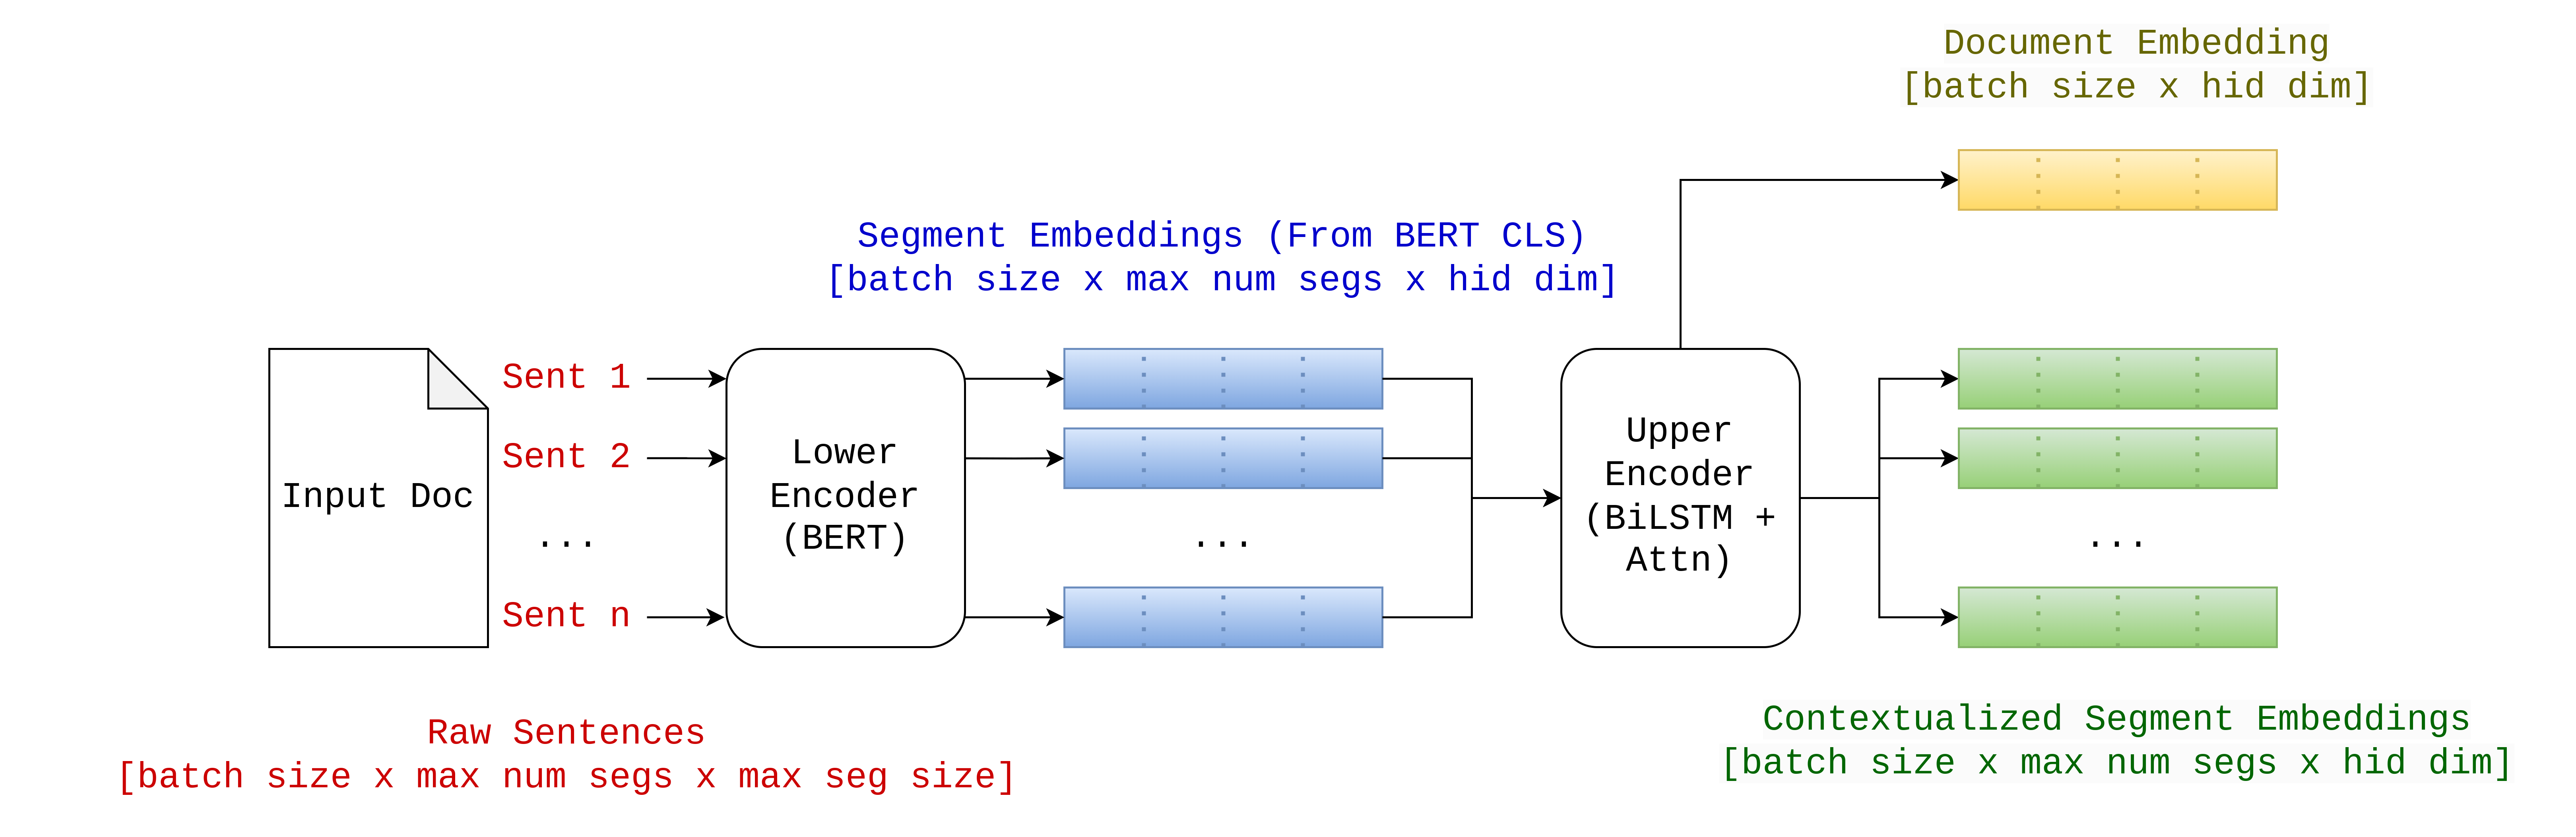

In [36]:
class HierBert(nn.Module):
    def __init__(self, encoder, fragment_size=32, drop=0.5):
        super().__init__()
        
        self.bert_encoder = encoder
        self.hidden_size = encoder.config.hidden_size
        self.fragment_size = fragment_size
        self.segment_encoder = LstmAttn(self.hidden_size, drop=drop)
        self.dropout = nn.Dropout(drop)
   
    def forward(self, input_ids=None, attention_mask=None): # [batch size, max num segments, max segment size], [batch size, max num segments, max segment size]
        batch_size, max_num_segments, max_segment_size = input_ids.shape
        
        # encode individual segments using Bert
        ## for this step, every segment is treated individually, and thus the sequences must be flattened
        input_ids_flat = input_ids.view(-1, max_segment_size) # [batch size * max num segments, max segment size]
        attention_mask_flat = attention_mask.view(-1, max_segment_size) # [batch size * max num segments, max segment size]

        ## pass through Bert, which returns a tuple as output, we only need the first element of the tuple that stores the hidden states
        encoder_outputs = self.bert_encoder(input_ids=input_ids_flat, attention_mask=attention_mask_flat)[0] # [batch size * max num segments, max segment size, hidden dim]
        ## we need only the embeddings of the CLS token, that gives us a embedding for every segment
        encoder_outputs = encoder_outputs[:, 0, :] # [batch size * max num segments, hidden dim]

        ## for the next step, we need to nest back / "un-flatten" the embeddings to their original shape  
        encoder_outputs = encoder_outputs.view(batch_size, max_num_segments, self.hidden_size) # [batch size, max num segments, hidden dim]
        attention_mask = attention_mask.any(dim=2) # [batch size, max num segments]
        
        # encode each example by aggregating Bert segment outputs
        sent_embeds, doc_embeds = self.segment_encoder(inputs=encoder_outputs, attention_mask=attention_mask) # [batch size, max num segments, hidden dim], [batch size, hidden dim]
        return sent_embeds, doc_embeds

**ModelOutput** is used to represent the output of a model in the transformers library.

In [37]:
from transformers.file_utils import ModelOutput

The **TextClassifierOutput** is a class that extends ModelOutput from the **transformers.file_utils** module, and defines the expected outputs of a text classification model.

The **loss** attribute is used to represent the loss of the model, typically used during training, while the **logits** attribute represents the output of the model before applying the softmax activation function, which can be used to obtain the probabilities for each class. 

The **hidden_states** attribute represents the hidden states of the model, which can be useful for tasks like transfer learning.

In [38]:
class TextClassifierOutput(ModelOutput):
    loss = None
    logits = None
    hidden_states = None

This is a PyTorch module for fine-tuning a hierarchical BERT model for text classification. The model consists of a HierBert encoder (a hierarchical BERT model) and a linear layer for classification. The **\_\_init__** method sets up the linear layer and the loss function. The **forward** method takes input IDs and attention masks as inputs, and passes them through the HierBert encoder to obtain the output and the hidden states. The output is then passed through the linear layer to obtain the logits, which are used to compute the loss. If the **labels** argument is not None, the method computes the binary cross-entropy loss between the logits and the labels. The method returns a **TextClassifierOutput** object containing the loss, the logits, and the hidden states. If the task is "semantic-segmentation", the logits are passed through a softmax function instead of a sigmoid function.

In [40]:
class HierBertForFineTuning(nn.Module):
    def __init__(self, hier_encoder, num_labels=1, label_weights=None, drop=0.5):
        super().__init__()
        
        self.hidden_size = hier_encoder.hidden_size
        self.num_labels = num_labels
        self.hier_encoder = hier_encoder
        self.classifier_fc = nn.Linear(hier_encoder.hidden_size, num_labels)
        
        if label_weights is None:
           label_weights = torch.ones(num_labels)
        self.loss_fct = nn.BCEWithLogitsLoss(pos_weight=label_weights) if TASK != 'semantic-segmentation' else nn.CrossEntropyLoss(weight=label_weights)
        self.dropout = nn.Dropout(drop)
    
    def forward(self, input_ids=None, attention_mask=None, labels=None):
        sent_embeds, doc_embeds = self.hier_encoder(input_ids=input_ids, attention_mask=attention_mask) # [batch size, max num segments, hidden dim], [batch size, hidden dim]
        sent_embeds = self.dropout(sent_embeds)
        doc_embeds = self.dropout(doc_embeds)

        ## these tasks need to perform prediction based on the overall document embedding
        if TASK in ["statute-identification", "judgment-prediction"]:
            logits = self.dropout(self.classifier_fc(doc_embeds).squeeze(-1))   # [batch size, num labels] for statute-identification, [batch size,] for judgment-prediction
        ## these tasks need to perform prediction based on every sentence embedding
        else:
            logits = self.dropout(self.classifier_fc(sent_embeds).squeeze(-1)) # [batch size, max num segments, num labels] for semantic-segmentation, [batch size, max num segments] for ext-summarization
        
        loss = None
        if labels is not None:
            loss = self.loss_fct(logits, labels)
        
        # softmax is applicable only for single-label multi-class tasks, binary and multi-label tasks require sigmoid
        logits = torch.sigmoid(logits) if TASK != 'semantic-segmentation' else F.softmax(logits, dim=-1)
        return TextClassifierOutput(loss=loss, logits=logits, hidden_states=(sent_embeds,doc_embeds)) 

# TRAINING SETUP --- Metrics, Hyper-parameters and Running Experiments


This line imports the functions **precision_score**, **recall_score**, and **f1_score** from the **sklearn.metrics** module. These functions are used for computing precision, recall, and F1 score, respectively, which are common evaluation metrics for binary and multi-class classification tasks.

In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

This function computes precision, recall, and F1 score for the predictions. The type of score calculated depends on the value of TASK, which is a global variable set earlier in the code.

The variable p is constructed by the Trainer automatically, and is a named tuple containing two parts:
p.predictions stores all the outputs returned by the model except loss, while p.label_ids is the labels provided to the model.

If TASK is "statute-identification", "judgment-prediction", or "ext-summarization", the predictions are converted to binary by applying a threshold value and the precision, recall, and F1 scores are calculated using the binary predictions.

If TASK is "semantic-segmentation", the predictions are argmaxed to get the predicted class and the scores are calculated based on the class predictions.

The computed scores are returned in a dictionary named 'metrics'.

In [42]:
def compute_metrics(p, threshold=0.5):
    metrics = {}
    ## sigmoid-based predictions are independent across all labels for a given example, we need to compare with a threshold to understand which labels are relevant
    if TASK in ["statute-identification", "judgment-prediction", "ext-summarization"]:
        preds = (p.predictions > threshold).astype(float)
    ## softmax-based predictions rank all labels for a given example, we just need to extract the label with highest probability
    elif TASK == "semantic-segmentation":
        preds = (p.predictions.argmax(axis=-1))
        
    refs = p.label_ids
    metrics['prec'] = precision_score(refs, preds, average='macro', zero_division=0) # zero_division=0 to suppress divide by zero warnings
    metrics['rec'] = recall_score(refs, preds, average='macro', zero_division=0) 
    metrics['f1'] = f1_score(refs, preds, average='macro', zero_division=0) 
    return metrics

This code is used to generate weights for the different classes, so that the rare classes can be given greater weightage in the loss calculation. Here we use the formula class_weight = total no. of examples / no. of examples the particular class occurs in

In [43]:
def generate_label_weights():
    weights = torch.zeros(len(label_vocab))
    for exp in tok_dataset['train']:
        for l in exp['labels']:
            weights[l] += 1
    return len(dataset['train']) / weights

In [44]:
label_weights = generate_label_weights().cuda()


In [45]:
from transformers import AutoModel
from torch.optim import AdamW

This code initializes the BERT encoder using the "nlpaueb/legal-bert-base-uncased" pre-trained weights. It then creates an instance of the **HierBert** class using the BERT encoder, and subsequently creates an instance of the **HierBertForFineTuning** class using the **HierBert** encoder, and the number of labels in the dataset.

The **num_labels** variable is set to the number of labels in the dataset if the task is "statute-identification" or "semantic-segmentation", and 1 otherwise. This is because in those two tasks, there are multiple labels that need to be predicted, while in other tasks, there is only one label.

In [46]:
bert_encoder = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")
hier_encoder = HierBert(bert_encoder)
num_labels = len(label_vocab) if TASK in ["statute-identification", "semantic-segmentation"] else 1
model = HierBertForFineTuning(hier_encoder, num_labels=num_labels, label_weights=label_weights)

Some weights of the model checkpoint at nlpaueb/legal-bert-base-uncased were not used when initializing BertModel: ['cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


This line initializes an instance of the AdamW optimizer, which is a variant of the Adam optimizer that uses weight decay regularization to prevent overfitting. The optimizer is used to update the parameters of the model during training.

The **lr** argument sets the learning rate of the optimizer, which determines how much the parameters are updated with each iteration of the optimizer. The learning rate is typically set to a small value to ensure the optimizer converges to a good solution. In this case, the learning rate is set to 1e-4, which means the parameters will be updated by a small amount each iteration.

In [47]:
opt = AdamW(model.parameters(), lr=5e-4, weight_decay=1e-2)

**TrainingArguments** is a class from the **transformers** library that specifies the arguments for training a model. It is used to configure the **Trainer** class, which is responsible for training and evaluating the model.

In [48]:
from transformers import TrainingArguments, Trainer

The TrainingArguments class defines the arguments for training a model using the Trainer class.


In [49]:
training_args = TrainingArguments(
    output_dir="Output",            #The directory where the model checkpoints and logs will be saved.
    do_train=True,                  #Whether to run training.
    do_eval=True,                   #Whether to run evaluation on the dev set.
    do_predict=True,                #Whether to run predictions on the test set.
    evaluation_strategy='epoch',    #The strategy to adopt during evaluation. Possible values are "no", "steps", "epoch".
    per_device_train_batch_size=32, #The batch size per GPU/CPU for training.
    per_device_eval_batch_size=32,  #The batch size per GPU/CPU for evaluation.
    gradient_accumulation_steps=2,  #The no. of steps to wait before running optimizer.step()
    learning_rate=5e-4,             #The learning rate for the optimizer.
    weight_decay=1e-2,              #The weight decay to apply to parameters.
    num_train_epochs=10,            #The total number of training epochs to perform.
    logging_strategy='epoch',       #The strategy to adopt during logging. Possible values are "no", "steps", "epoch".
    logging_first_step=True,        #Whether to log the first global step.
    save_strategy='epoch',          #The strategy to adopt during checkpoint saving. Possible values are "no", "steps", "epoch".
    save_total_limit=3,             #Limit the total amount of checkpoints. Deletes the older checkpoints. Only used when save_strategy="epoch".
    seed=42,                        #The random seed.
    dataloader_num_workers=2,       #Number of subprocesses to use for data loading.
    load_best_model_at_end=True,    #Whether to load the best model found during training at the end of training.
    metric_for_best_model='f1',     #The metric to use for the best model.
    greater_is_better=True,         #Whether the best model is the one with the highest or lowest value of the metric.
    group_by_length=True,           #Whether to group the samples by length.
)

This creates a **Trainer** object for fine-tuning the **model** using the provided **training_args**. The **data_collator** is an instance of **DataCollatorForHierBert**, which will be used to collate the samples into batches suitable for the model. The training and evaluation datasets are provided as **train_dataset** and **eval_dataset**, respectively, and the **compute_metrics** function will be used to evaluate the performance of the model during training and evaluation. The optimizers argument specifies the **optimizer** to be used during training (**opt**) and the second argument is set to **None**, which means the model will use its default optimizer.

In [50]:
trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=DataCollatorForHierBert(tokenizer=tokenizer),
    train_dataset=tok_dataset['train'],
    eval_dataset=tok_dataset['test'],
    compute_metrics=compute_metrics,
)

Train the model

In [49]:
if training_args.do_train:
    _, loss, metrics = trainer.train(ignore_keys_for_eval=['hidden_states'], resume_from_checkpoint=False)
    trainer.save_model()
    trainer.save_metrics('train', metrics)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Prec,Rec,F1
1,1.301300,1.683389,0.063387,0.300000,0.098583
2,1.324900,1.666064,0.070791,0.500000,0.112178
3,1.309200,1.583528,0.106187,0.500000,0.168971
4,1.281700,1.651153,0.089858,0.600000,0.144205
5,1.273800,1.613246,0.089554,0.500000,0.143135
6,1.281200,1.614589,0.086815,0.600000,0.139104
7,1.272800,1.579572,0.121298,0.700000,0.196743
8,1.287600,1.578388,0.102231,0.600000,0.164715
9,1.273500,1.596582,0.129310,0.700000,0.208422
10,1.267000,1.603851,0.129310,0.700000,0.208422


This code snippet performs evaluation on the test dataset by calling the **evaluate** method of the trainer object. The **ignore_keys** parameter is used to exclude the **hidden_states** key from the evaluation. The evaluation results are stored in the **metrics** variable, which is printed to the console. Finally, the evaluation metrics are saved to the **'test'** file using the trainer.**save_metrics()** method.

In [50]:
if training_args.do_eval:
    metrics = trainer.evaluate(eval_dataset=tok_dataset['test'], ignore_keys=['hidden_states'])
    print(metrics)
    trainer.save_metrics('test', metrics)

{'eval_loss': 1.5965824127197266, 'eval_prec': 0.12931034482758622, 'eval_rec': 0.7, 'eval_f1': 0.20842209535502393, 'eval_runtime': 16.7664, 'eval_samples_per_second': 58.808, 'eval_steps_per_second': 1.849, 'epoch': 10.0}


The code below is for testing the trained model on the test dataset and saving the predictions and labels to a file. The ***if training_args.do_predict*** condition checks if the option to perform predictions is enabled. If so, the trained model is loaded from the saved checkpoint, and the **predict** method of the **Trainer** class is called on the test dataset. The **ignore_keys** argument is used to exclude the **hidden_states** from the prediction output to reduce memory usage.

The predictions and labels are then saved to a pickle file named **predictions.pkl** in the **Output** directory.

In [51]:
import os
import pickle as pkl

In [52]:
if training_args.do_predict:
    model.load_state_dict(torch.load(os.path.join("Output", "pytorch_model.bin")))
    test_predictions, test_labels, test_metrics = trainer.predict(test_dataset=tok_dataset['test'], ignore_keys=['hidden_states'])
    with open(os.path.join("Output", "predictions.pkl"), 'wb') as fw:
        pkl.dump({'predictions': test_predictions, 'labels': test_labels}, fw)